# Data Viz with Matplotlib 2

Welcome back. Yesterday, we introduced the main (Object Oriented) syntax for `matplotlib`. Today we will take a closer look at how to plot data and introduce the main arguments to know when using `matplotlib`.

We start by importing the usual packages and specifying the `inline` backend.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Today, we will be working with extract from the US Baby Names dataset. It contains information about first names' use in the US from 1965 to 2014. Originally, the data is distributed by the Social Security Administration. It contains the frequency and associated Gender for all names given to newborns in the US in any given year from from 1880 -- conditional on the name being used at least 5 time in that year. I downloaded the original data from <a href="https://www.kaggle.com/kaggle/us-baby-names/data?select=NationalNames.csv">Kaggle</a> and re-worked it to minimize `pandas` code in this workshop.

Here we load data about the use of the names `Barack` and `Ronald`.

In [ ]:
# Load the data directly from the repository on github
barack_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/barack.csv?token=AFYWZVFJXSDZP4NE7UCH7ALBA4AJC'
barack = pd.read_csv(barack_data_url)

In [15]:
# Same with Ronald data
ronald_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/ronald.csv?token=AFYWZVGAHHVATGRSIXQD7C3BA4AMG'
ronald = pd.read_csv(ronald_data_url)

# Show the first 5 rows of the barack data
barack.head()

,Unnamed: 0,Id,Count,Year
0,1586035,1586036,5,2007
1,1610732,1610733,52,2008
2,1645079,1645080,69,2009
3,1681104,1681105,28,2010
4,1716858,1716859,15,2011


### Colors, Markers & Lines

We want to visualize whether the popularity of the name "Barack" changed during the Obama presidency. Our data for the x axis will be the `Year` column from the `barack` dataframe. Our y data will be the `Count` column from the same dataframe.

Let's start with the simplest plot. We have already seen all of these commands last time.

Text(0, 0.5, 'Number of newborns named "Obama"')

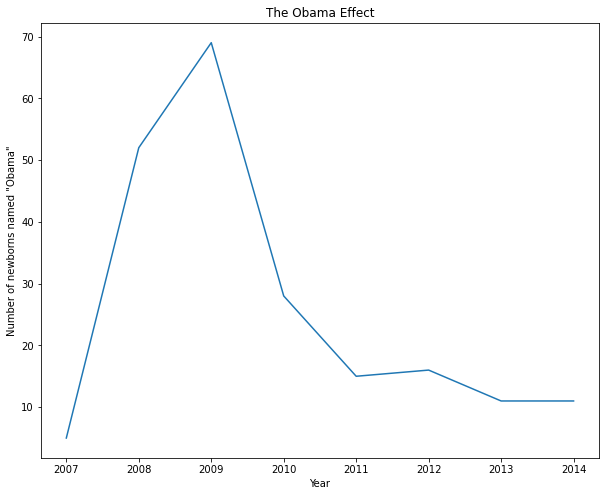

In [3]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(barack['Year'], barack['Count'])
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

#### Colors

The first thing we want to do is to specify a color for our plot. This will show how `matplotlib` handles colors more in general -- something very helpful to know! 

To specify that we want to change the color of our line in the plot, we have to use the argument `color` of the `ax.plot()` method. In general, when there is a color to be changed in `matplotlib`, you can use the argument `color` -- for example, we will see this hold true for the `ax.histogram()` method. 

Yet, what do we pass to the `color` argument? How do we communicate the color we want to `matplotlib`?

In general there are three ways to refer to a color in `matplotlib`:

1. Use a pre-specified color name. `Matplotlib` uses special names to refer to specific colors -- for example, the name "red". You can find the complete list of named colors in this [page from the official documentation](https://matplotlib.org/stable/gallery/color/named_colors.html).

2. Specify the color coordinates through a RGB or RBGA code. This allows for more fine control.

3. Hex strings -- which are another way to specify RGB (or RGBA) coordinates.


 <div class="alert alert-block alert-success">
<b> Specify Colors </b>: For a more complete guide on how to specify colors in <code>matplotlib</code>, check the <a href=https://matplotlib.org/stable/tutorials/colors/colors.html>official tutorial</a>.
        </div>

##### Named Color

Color names are special string that `matplotlib` maps to specific color once you pass such strings in a `color` argument. For example, the string `g` is mapped to a green color if passed in the `color` argument, the string `r` is mapped to a red color, etc.

Text(0, 0.5, 'Number of newborns named "Obama"')

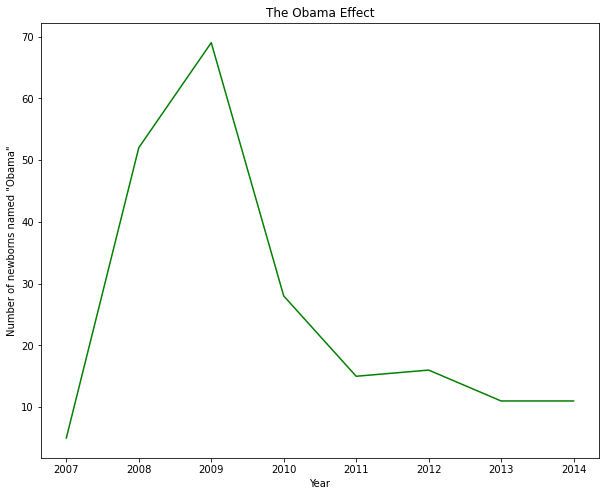

In [4]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color='g')
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### RGB(A)

But sometimes we want to reproduce a specific color and we need more control than a simple string code. In these cases, we can use an RGB color code.

The RGB code is a 3-elements `tuple` (but `matplotlib` will not complain if you pass a `list` or other `tuple`-like objects) specifying the red, green, blue component of the color you want -- following the well known [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model). Unlike many other applications dealing with color specification, `matplotlib` expect you to specify the RGB component as a number from 0 to 1. 

For example, the RGB code `(0,0,1)` has no Red component, no Green component, but goes all-in on the Blue component. This is the bluest blue you can get. Another example, the code `(0, 0, 0)` is the darkest black while `(1, 1, 1)` is the whitest white.

In the following example we go for a mid-gray.

<div class="alert alert-block alert-success">
    <b>Color Models</b>: The RGBA coordinate color scheme is in no way the only possible way to create a reference system for colors. Other popular options are the <a href=https://en.wikipedia.org/wiki/HSL_and_HSV>Hue-Saturation-Light model</a>, the <a href=https://en.wikipedia.org/wiki/HSL_and_HSV>Hue-Saturation-Value system</a>, the <a href=https://en.wikipedia.org/wiki/Web_colors>hexadecimal model</a>, the <a href=https://en.wikipedia.org/wiki/CMYK_color_model>Ciano-Magenta-Yellow-Black model</a> and the <a href=https://en.wikipedia.org/wiki/CIELAB_color_space>CIELAB model</a>. Each model emphasizes different characteristics of colors and it is helpful in its own way. Matplotlib supports the Hue-Saturation-Value system in its sub-module color.
    </div>

Text(0, 0.5, 'Number of newborns named "Obama"')

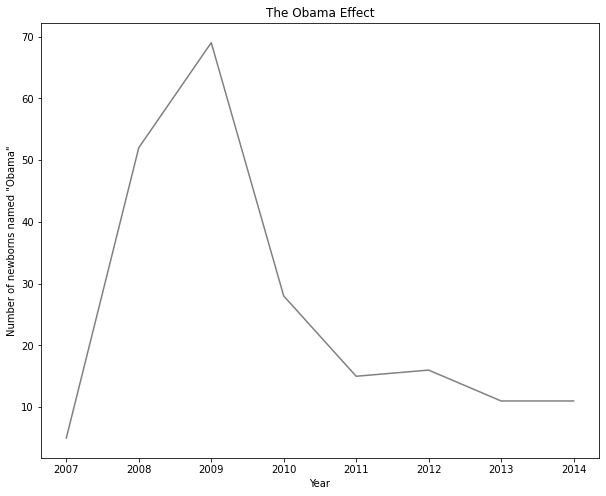

In [5]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5))
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Setting transparency with the alpha parameter

Finally, we can use a RBGA code to specify a color *and* a transparency parameter. The transparency parameter is commonly known as `alpha`. This can be done by simply passing a 4-elements `tuple` (instead of a 3-elements `tuple`) in the `color` argument. As for the RGB components, the `alpha` components should be between 0 (full transparency, no show) to 1 (full opacity)

For example, what happens to the previous plot when we set transparency to 0.5?

Text(0, 0.5, 'Number of newborns named "Obama"')

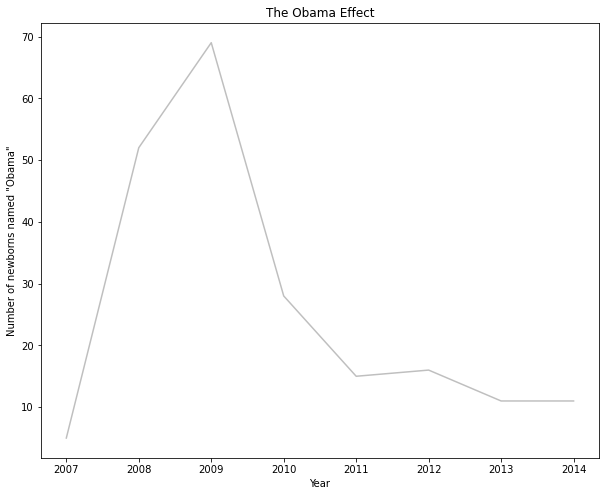

In [6]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# notice the color argument
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5))
# Usual settings, we saw this above
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')
# Compare the result with the previous plot

##### Exercise 1

Modify the code to replicate the same plot as above, but this time, use another named color of your choice from the CSS section of [this page](https://matplotlib.org/stable/gallery/color/named_colors.html).

Text(0, 0.5, 'Number of newborns named "Obama"')

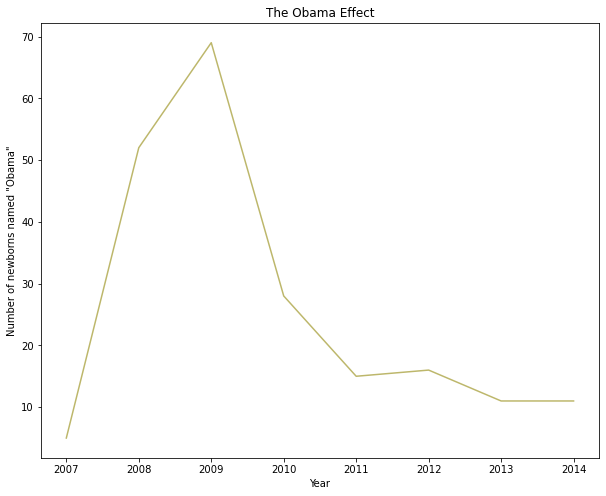

In [20]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Use another color for the plot
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5))
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Markers & Lines: Emphasize data over interpolation

Once the color is set, we may also want to change the line style (and width) or add some markers. Notice that, so far, we are showing the data as a continous function, but we actually only have 8 data-points -- everything else we show is a linear interpolation that `ax.plot()` will add for us by default. The linear interpolation is helpful to see trends in the data, but we may want to remark that actually we only have a sample of 8 points. 

We will do this in 2 stages. First, we will de-emphasize the line: we will dash it, make it thinner and half transparent. This will diminsh the emphasis on the line. This can be achieved through the `color`, `linestyle` and `linewidth` arguments of `ax.plot()`. The `linestyle` and `linewidth` arguments do what their names suggest: `linestyle` accept a string indicating a specific line style, `linewidth` accept a float indicating the width of the line (by default, this argument is set to 1.5). 

Exactly as was the case for the `color` argument, the `linestyle` and `linewidth` argument are not specific to `ax.plot()` and you can use them to change the style and width of lines any time you plot one (be it with the `ax.plot()` method or otherwise).

 <div class="alert alert-block alert-success">
    <b> Linestyle </b>: Above, I simplify the <code>linestyle</code> argument when I write that it accepts strings. You can actually specify your own linestyle by means of <code>tuples</code> code. For example, the "dashed" style used below corresponds to the tuple code <code>(0, (5, 1))</code>: if you substitute the string <code>"dashed"</code> with <code>(0, (5, 1))</code>, you will obtain no change. You can check the <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html>official tutorial</a> for more information on this way of specifying linestyles.
        </div>

Text(0, 0.5, 'Number of newborns named "Obama"')

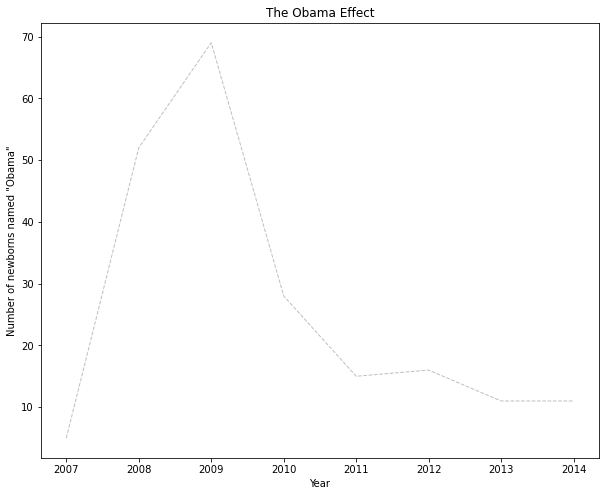

In [7]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# the dark side of khaki
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashed', linewidth=1.)
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

So far, so good. The second part of the strategy is to plot those data-points we really have _above_ the line (in full opacity) _as markers_. This way, it will be clear that the line is secondary with respect to the the data-points. How can we do this? This is another important principle of `matplotlib` (and other visualization libraries): you create your plot sequentially by adding one plot-stratum at the time, with the last stratum added being the one on top. 

In the case at hand, this means that we will first call `ax.plot()` to draw the linearly-interpolated data -- we have already done this multiple times. After this, we will call `ax.plot()` again to plot the data as points (as opposed to lines!). In this second call to `ax.plot()`, we will change the `linestyle` argument to `'None'` to plot _no_ line. We will change the `color` argument to a solid black, indicated with the color name `'b'`. Then, we will specify a `marker` argument to draw the markers and a `markersize` (or `ms`) argument to make the markers bigger.

In a way, this produce a scatter plot on top of the line we have drawn so far. In fact, we could swap the second `ax.plot()` call with a call to `ax.scatter()` -- the method to draw scatter plots that we will explore tomorrow. The point is that,  in the same `Axes`, you can overlap drawing generated from any method (or function).

 <div class="alert alert-block alert-success">
    <b> Format string </b>: It is possible to condense the two calls of the <code>ax.plot()</code> method to only one call, thanks to the special argument <code>fmt</code> (abbreviation of "format string") of this method. Here, we do not discuss the use of this argument because it is very specific to the <code>ax.plot()</code> method, but check the <a href=https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html>official documentation</a> for an overview of how it works.
        </div>

Text(0, 0.5, 'Number of newborns named "Obama"')

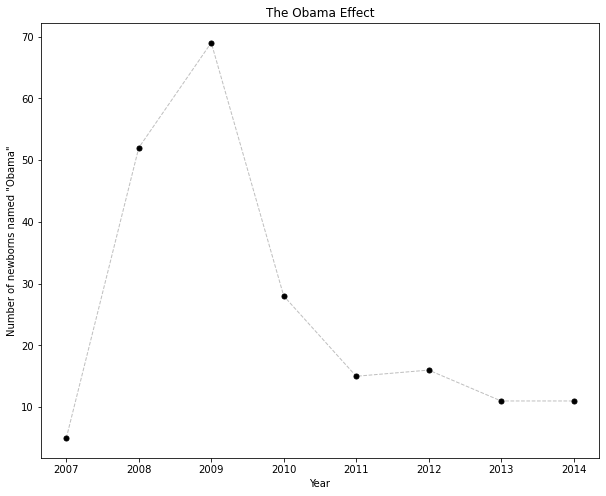

In [10]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Same call as above
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashed', linewidth=1.)
# New line, plot the data as scatter plot. Notice the marker and ms arguments
ax.plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

##### Exercise 2

Modify the plot below so as to reproduce the same plot as the last one, but 

1. Use a `dashdot` linestyle;
2. Use a different marker of your choice from [this list](https://matplotlib.org/stable/api/markers_api.html);
3. Increase the markersize to 20;
4. Change the color of the markers to any shade of blue.

Text(0, 0.5, 'Number of newborns named "Obama"')

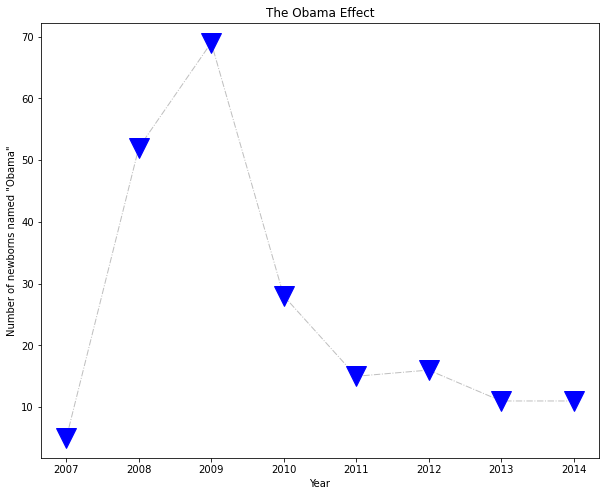

In [11]:
# The Fundamental Line
fig, ax = plt.subplots(figsize= (10,8))
# Choose line style and line width
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5)) # add arguments
# Choose marker, marker size, color
ax.plot(barack['Year'], barack['Count'], linestyle='None') # add arguments
ax.set_title('The Obama Effect')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Obama"')

#### Comparing Data: Setting the Scale

In this section we will compare the popularity of the name "Obama" with the popularity of the name "Ronald", the first name of the former US President Ronald Reagan. One possible strategy is to plot the two series in two independent `Axes` of the same `Figure`. We will see that the main difficulty here is making sure that the the two `Axes` are on the same meaningful scale, so that the  user can easily grasp the narrative by comparing the plots.

Text(0, 0.5, 'Number of newborns named "Ronald"')

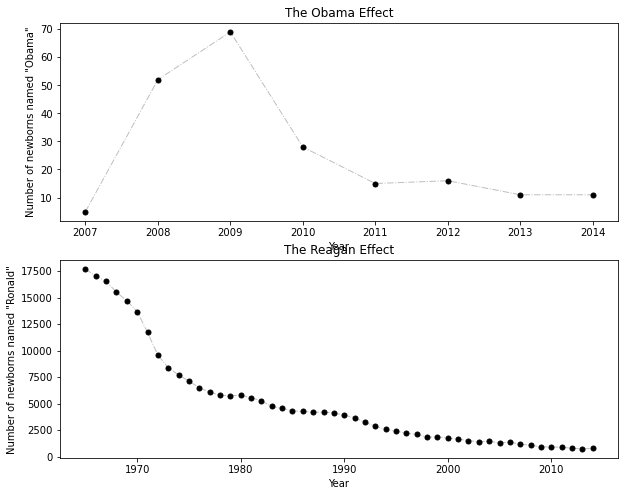

In [16]:
# The Fundamental Line
fig, ax = plt.subplots(nrows=2, ncols=1, figsize= (10,8))
# Obama call as above
ax[0].plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[0].plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[0].set_title('The Obama Effect')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of newborns named "Obama"')
# New Ronald call
ax[1].plot(ronald['Year'], ronald['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[1].plot(ronald['Year'], ronald['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[1].set_title('The Reagan Effect')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of newborns named "Ronald"')

This is terrible in so many ways! We should, at least, put the two plots on the same x and y scale. Second, let's make sure the two titles do not overlap. Third, let's give the entire `Figure` (not the single `Axes`) an overall title.

(1962.55, 2016.45)

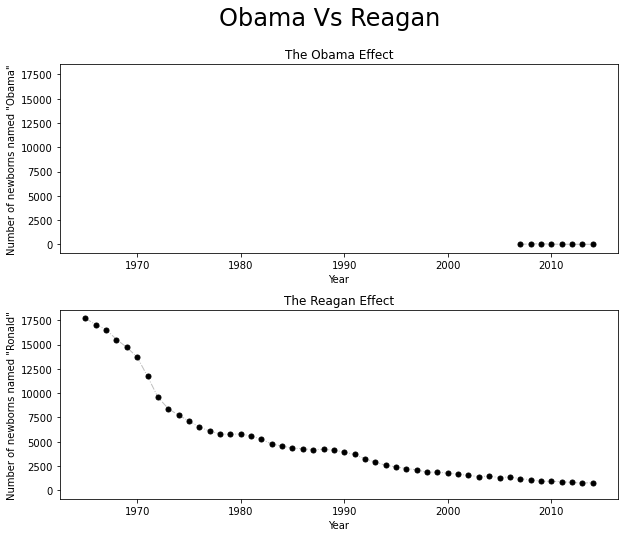

In [17]:
# We make the same calls as above, but we change their scale with xlim and ylim
# We know that ronald is the datasets having larger x and y spans, so we use its
# minimum/maximum on both axis as our limits.
x_lim = [ronald['Year'].min(), ronald['Year'].max()]
# For aesthetic purposes I leave a little more room on the right/left and top/bottom
span_x = x_lim[1]-x_lim[0]
x_lim = [x_lim[0] - (0.05*span_x), x_lim[1] + (0.05*span_x)]
# Let's fix the y minimum to 0
y_lim = [0, ronald['Count'].max()]
# Same as above, I expand the span a little
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0] - (0.05*span_y), y_lim[1] + (0.05*span_y)]



# The Fundamental Line. We make some more vertical room with the hspace gridspec kw
# if you wondering I chose the value .3 with trial and error
fig, ax = plt.subplots(nrows=2, ncols=1, figsize= (10,8), gridspec_kw={'hspace':.3})
# The overall title, notice that it is a method of the containing figure, this is logical!
fig.suptitle("Obama Vs Reagan", fontsize=24)

# Obama call as above
ax[0].plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[0].plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[0].set_title('The Obama Effect')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of newborns named "Obama"')
# But now we pass the xlim and ylim explicitly to the axis
ax[0].set_xlim(x_lim)
ax[0].set_ylim(y_lim)
# New Ronald call
ax[1].plot(ronald['Year'], ronald['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[1].plot(ronald['Year'], ronald['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[1].set_title('The Reagan Effect')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of newborns named "Ronald"')
# Pass the xlim and ylim explicitly to the axis, for this axes as well
ax[1].set_ylim(y_lim)
ax[1].set_xlim(x_lim)

Now we start to have a better plot...but notice that we killed any movement we could observe in the Obama plot due to rescaling. For cases like these, we can use a log scale to represent the data.

There are two ways to do this. We can manually transform the data _before_ sending it to the plot. This implies that we will recalculate the `y_lim` manually. Otherwise, we can ask `matplotlib` to transform the data for us _after_ having called the `ax.plot()` method. The latter option spares us the need to recalculate the limits since `matplotlib` will take care of rescaling those as well -- with the caveat that we need to make sure we do not pass a negative value to a `log` transformation! There is a catch though, you 

The lower y limit is currently -884.85. Since it is negative, we change it to 1


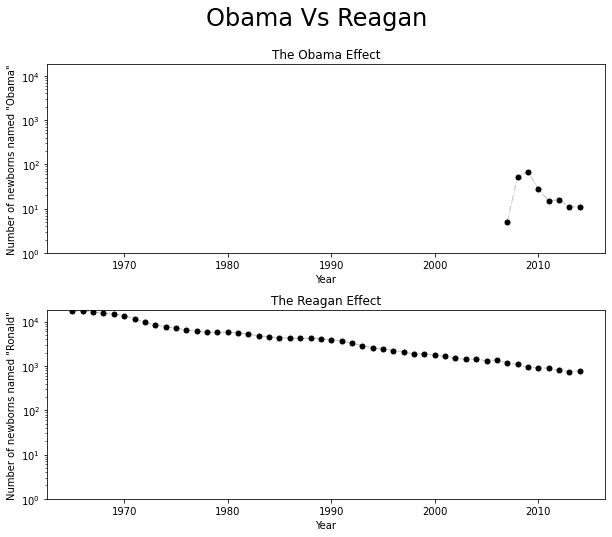

In [18]:
print(f"The lower y limit is currently {y_lim[0]}. Since it is negative, we change it to 1")
y_lim[0] = 1

# The Fundamental Line.
fig, ax = plt.subplots(nrows=2, ncols=1, figsize= (10,8), gridspec_kw={'hspace':.3})
fig.suptitle("Obama Vs Reagan", fontsize=24)

# Obama call as above
ax[0].plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[0].plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[0].set_title('The Obama Effect')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of newborns named "Obama"')

# Pass the same xlim and ylim to the axis
ax[0].set_xlim(x_lim)
ax[0].set_ylim(y_lim)
# Transform the scale
ax[0].set_yscale('log')

# New Ronald call
ax[1].plot(ronald['Year'], ronald['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[1].plot(ronald['Year'], ronald['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[1].set_title('The Reagan Effect')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of newborns named "Ronald"')
# Pass the same xlim and ylim to the axis
ax[1].set_xlim(x_lim)
ax[1].set_ylim(y_lim)
# Transform the scale
ax[1].set_yscale('log')


As a final touch, we will add vertical lines to signal the beginning and end of the presidential terms for Reagan and Obama. We will use `ax.axline()` to draw the vertical lines. To draw a line with `ax.axline()` we will specify two points through which we want the line to pass. The points coordinate can be passed as a `tuple` -- for example, `(0, 0)` is the coordinate of the origin. Notice that `ax.axline()` will create an infinite line passing for the two points, not just a segment.

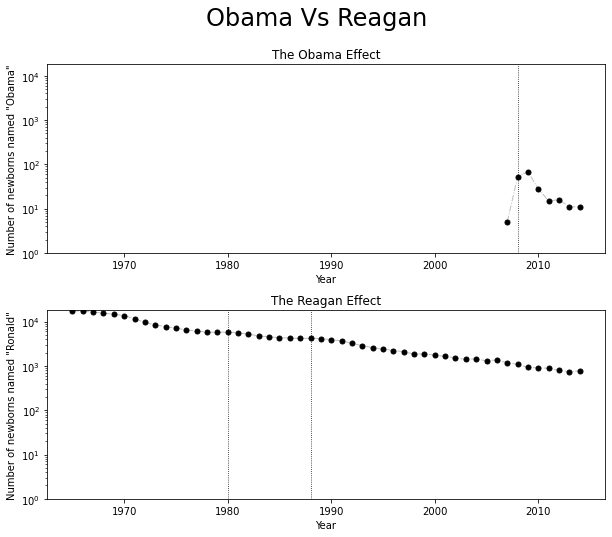

In [19]:
# The Fundamental Line.
fig, ax = plt.subplots(nrows=2, ncols=1, figsize= (10,8), gridspec_kw={'hspace':.3})
fig.suptitle("Obama Vs Reagan", fontsize=24)

# Obama call as above
ax[0].plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[0].plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[0].set_title('The Obama Effect')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of newborns named "Obama"')
# Pass the same xlim and ylim to the axis
ax[0].set_xlim(x_lim)
ax[0].set_yscale('log')
ax[0].set_ylim(y_lim)
# Draw the vertical line
first_obama_point = (2008, 0.1)
second_obama_point = (2008, y_lim[1])
# This command draw the line. Notice the usual color, etc. to style the line as we want
ax[0].axline(first_obama_point, second_obama_point, color='black', linewidth=0.8, linestyle='dotted')

# New Ronald call
ax[1].plot(ronald['Year'], ronald['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[1].plot(ronald['Year'], ronald['Count'], color='black', linestyle='None', marker='.', ms=10)
ax[1].set_title('The Reagan Effect')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of newborns named "Ronald"')
# Pass the same xlim and ylim to the axis
ax[1].set_xlim(x_lim)
ax[1].set_yscale('log')
ax[1].set_ylim(y_lim)
# Draw the vertical lines
# Notice that we have both the beginning and the end of the Reagan's presidency in the data
first_reagan_point = (1980, 0.1)
second_reagan_point = (1980, y_lim[1])
third_reagan_point = (1988, 0.1)
fourth_reagan_point = (1988, y_lim[1])
# This command draw the line. Notice the usual color, etc. to style the line as we want
ax[1].axline(first_reagan_point, second_reagan_point, color='black', linewidth=0.8, linestyle='dotted')
ax[1].axline(third_reagan_point, fourth_reagan_point, color='black', linewidth=0.8, linestyle='dotted')

##### Exercise 3

It seems that Obama had some effect on babies' names, but Reagan had no such effect. What about first ladies?

In the following cell, I load the name data for "Michelle" (Obama) and "Nancy" (Reagan).

In [20]:
# Load the data directly from the repository on github
michelle_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/michelle.csv?token=AFYWZVHWOEWZFODPYY3A2DDBA4A3K'
michelle = pd.read_csv(michelle_data_url)

# Load the data directly from the repository on github
nancy_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/nancy.csv?token=AFYWZVHX74DKVDSPE23IMOTBA4A5K'
nancy = pd.read_csv(nancy_data_url)

Now, complete the code below to reproduce the same plot we created for the "Barack"-"Ronald" comparison. That is,

1. Create the `Figure` and `Axes`:
    1. Create a new `y_lim` variable
    2. Create two `Axes` in the same column with the _fundamental line_.
    3. Set the `fig.suptitle()` to "Obama Vs Reagan, First Ladies"
2. "Michelle" `Axes:
    1. Plot the `michelle` data in the top `Axes`
    2. Set the `xlim` and `ylim` of the top `Axes`, **do not** change the scale to log
    3. Create a vertical line indicating the beginning of the Obama presidency
    4. Change the x label to "Year"; change the y label to "Number of newborns named 'Michelle'"; change the `Axes` title to "The Obama Effect"

3. "Nancy" `Axes`:
    1. Plot the `nancy` data in the bottom `Axes`
    2. Set the `xlim` and `ylim` of the top `Axes`, **do not** change the scale to log
    3. Create a vertical line indicating the beginning of the Reagan presidency
    4. Create a vertical line indicating the end of the Reagan presidency
    5. Change the x label to "Year"; change the y label to "Number of newborns named 'Nancy'"; change the `Axes` title to "The Reagan Effect"

[0, 36179.85]
[1962.55, 2016.45]


Text(0, 0.5, 'Number of newborns named "Nancy"')

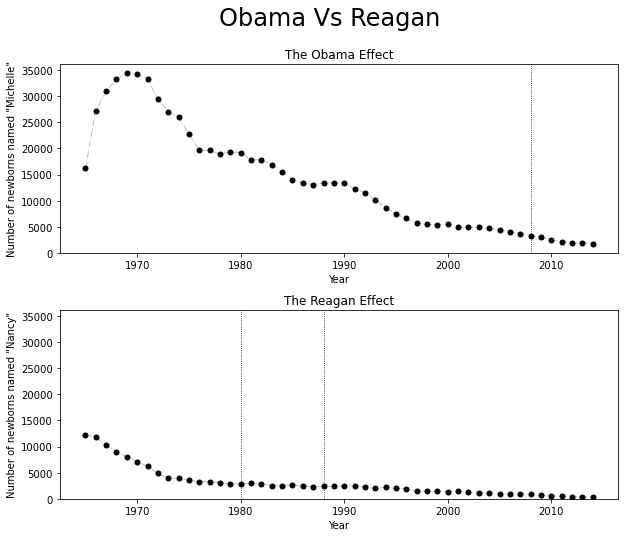

In [24]:
x_lim = [nancy['Year'].min(), nancy['Year'].max()]
span_x = x_lim[1] - x_lim[0]
x_lim = [x_lim[0] - (0.05*span_x), x_lim[1] + (0.05*span_x)]
# Find the y max with np.max()
data_max = np.max([nancy['Count'].max(), michelle['Count'].max()])
# Create the new y_lim. 
# The y should span from 0 to the maximum in the data
y_lim = 
# Same as above, I expand the span a little
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.05*span_y)]
print(y_lim)
print(x_lim)

# Re-create points for the vertical lines
# Draw the vertical line
first_obama_point = (2008, 0.1)
second_obama_point = (2008, y_lim[1])
first_reagan_point = (1980, 0.1)
second_reagan_point = (1980, y_lim[1])
third_reagan_point = (1988, 0.1)
fourth_reagan_point = (1988, y_lim[1])



# The Fundamental Line. 
# Complete the code
fig, ax = plt.subplots(nrows= 2, ncols= 1, figsize= (10,8), gridspec_kw={'hspace':.3})
# Set the sup title
fig.suptitle("Obama Vs Reagan", fontsize=24)

# Obama call as above
# Plot the Michelle data 
ax[0].plot(, , color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax[0].plot(, , color='black', linestyle='None', marker='.', ms=10)
ax[0].set_title('The Obama Effect')
ax[0].set_xlabel('Year')
# Set x lim and y lim for this Axes
ax[0].set_xlim()
ax[0].set_ylim()
# Complete the call to draw the line
ax[0].axline(, , color='black', linewidth=0.8, linestyle='dotted')
# Set the y-axis label
ax[0].

# Plot the Michelle data 
ax[1].plot()
ax[1].plot()
ax[1].set_title('The Reagan Effect')
ax[1].set_xlabel('Year')
# Set x lim and y lim for this Axes
ax[1].set_xlim()
ax[1].set_ylim()
# Draw the first vertical line
ax[1].axline(, , color='black', linewidth=0.8, linestyle='dotted')
# Draw the second vertical line
ax[1].
# Set the y-axis label
ax[1].

#### Comparing Data: Rectangles, Legends and Styles

As our last plot of today, we will compare the Barack and Ronald data in one plot. In general, this will eliminate the necessity of harmonizing the scale between two `Axes`, but we will need a legend to make the plot legible.

Let's start with our basic plot, which we will enrich step by step. 

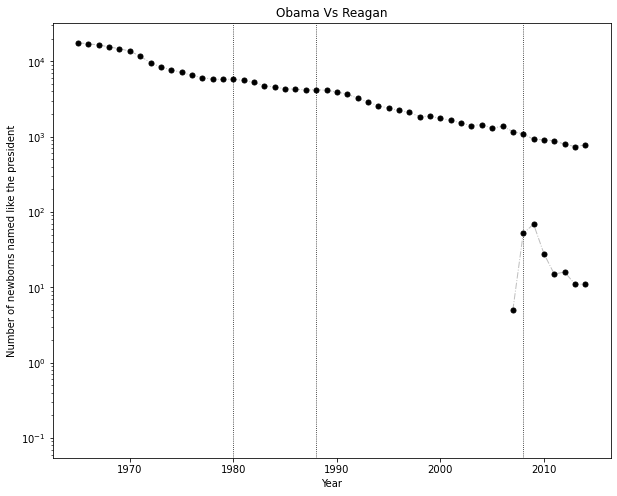

In [25]:
# Only one Axes
fig, ax = plt.subplots(figsize= (10,8))

# Obama and ronal plot, as above
ax.plot(barack['Year'], barack['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(barack['Year'], barack['Count'], color='black', linestyle='None', marker='.', ms=10)
ax.plot(ronald['Year'], ronald['Count'], color=(0.5, 0.5, 0.5, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(ronald['Year'], ronald['Count'], color='black', linestyle='None', marker='.', ms=10)
ax.set_title('Obama Vs Reagan')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
# Still on the log scale to help see trends
ax.set_yscale('log')
# Draw the vertical line indicating the presidential mandates
first_obama_point = (2008, 0.1)
second_obama_point = (2008, ronald['Count'].max())
first_reagan_point = (1980, 0.1)
second_reagan_point = (1980, ronald['Count'].max())
third_reagan_point = (1988, 0.1)
fourth_reagan_point = (1988, ronald['Count'].max())
ax.axline(first_obama_point, second_obama_point, color='black', linewidth=0.8, linestyle='dotted')
ax.axline(first_reagan_point, second_reagan_point, color='black', linewidth=0.8, linestyle='dotted')
ax.axline(third_reagan_point, fourth_reagan_point, color='black', linewidth=0.8, linestyle='dotted')

##### Legend

Quite clearly, the main problem of the previous plot is impossibility of distinguishing the "Barack" data from the "Ronald" data. For this purpose, we will use a legend. 

In `matplotlib` building a legend is composed of two phases. First, you must specify an argument `label` for those element of the plot you want to refer to in the legend. In our case, we must specify a `label` when we plot the markers showing the "Barack" and the "Ronald" data. Second, you will call the method `ax.legend()` to actually build the legend in the plot. Notice that `ax.legend()` will understand which element you want to mention in the legend thanks to the `label` argument. 

Naturally, you must also ensure that the elements you want to distinguish look different in the plot! In our case we will color the lines and markers for the two names of blue and red, for "Barack" and "Reagan" respectively.

Finally, while we are here, we will set the y limit manually. The automatic y limit occupy a lot of space with values that are impossible given the nature of the data -- on the log scale, the values below $10^0$ are not relevant for us, since we only deal with integers.

[1, 19466.6]


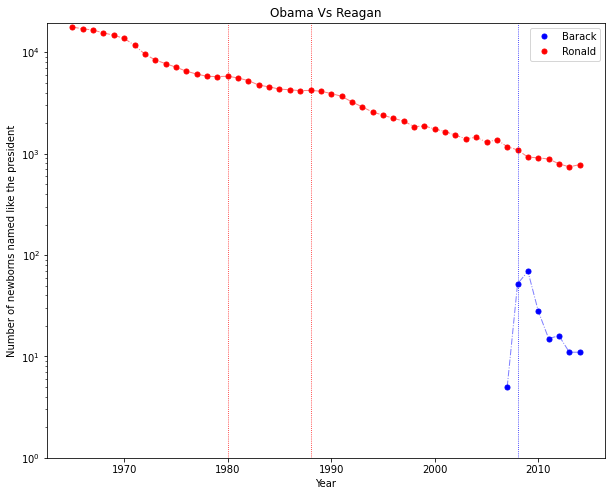

In [26]:
# Let's fix the y minimum to 1 = 10^0
y_lim = [1, ronald['Count'].max()]
# Same as above, I expand the span a little
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.1*span_y)]
print(y_lim)

# Remake the plot
fig, ax = plt.subplots(figsize= (10,8))
# We go full blue for the Obama data
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
# Notice the Label
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10, label='Barack')
ax.plot(ronald['Year'], ronald['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(ronald['Year'], ronald['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10, label='Ronald')
ax.set_title('Obama Vs Reagan')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
# New y limit
ax.set_ylim(y_lim)
ax.set_yscale('log')
# We also change the color of the vertical lines
ax.axline(first_obama_point, second_obama_point, color=(0,0,1), linewidth=0.8, linestyle='dotted')
ax.axline(first_reagan_point, second_reagan_point, color=(1,0,0), linewidth=0.8, linestyle='dotted')
ax.axline(third_reagan_point, fourth_reagan_point, color=(1,0,0), linewidth=0.8, linestyle='dotted')

# Now the legend is easy to get
ax.legend()

##### Exercise 4

Below, you can find the code to create the same plot for the names "Michelle" and "Nancy". However, the plot lacks a legend. Complete/modify the code: Add the legend and make sure the two data-lines look different (you may choose colors different from blue and red if you prefer).

[1, 37902.6]


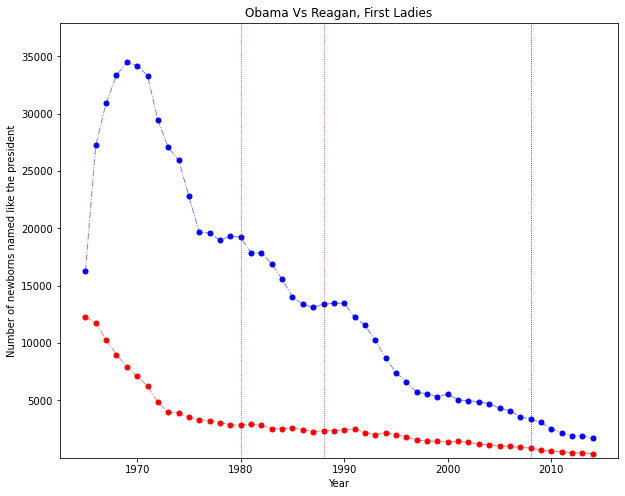

In [31]:
# Fix the y minimum to 1 = 10^0
y_lim = [1, data_max]
# Expand the y-span a little
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.1*span_y)]
print(y_lim)

# Remake the plot
fig, ax = plt.subplots(figsize= (10,8))

# Add the label to the Michelle data
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10)

# Add the label to the nancy data
ax.plot(nancy['Year'], nancy['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(nancy['Year'], nancy['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10)

# Take care of the rest
ax.set_title('Obama Vs Reagan, First Ladies')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
# Set y limit
ax.set_ylim(y_lim)
# Vertical lines
ax.axline(first_obama_point, second_obama_point, color=(0,0,1), linewidth=0.8, linestyle='dotted')
ax.axline(first_reagan_point, second_reagan_point, color=(1,0,0), linewidth=0.8, linestyle='dotted')
ax.axline(third_reagan_point, fourth_reagan_point, color=(1,0,0), linewidth=0.8, linestyle='dotted')

# Add the legend


##### Rectangle Patches

The vertical lines are fine, but we should be more explicit on their meaning. We can shade the relevant area with red and blue to indicate that those years were associated with one of the two presidents. Then, we can even add the meaning of the shaded area in the legend, to be very explicit on their meaning.

To do this, we will need to go down one level in the `matplotlib` API. That is, we will need to explicitly build rectangles and fill them with a blue/red shade. The shaded rectangle will occupy all the area now delimited by the vertical lines.

This cannot be done directly within the `plt` submodule, but we need to import a new part of `matplotlib`. Specifically, `matplotlib.patches`, which contains an object representing a rectangle. Unsurprisingly, the object is simply named `matplotlib.patches.Rectangle()`. More in general, you will use `matplotlib.patches` when you want to add a simple shape to your plot, such as a circle, a square, an arrow, etc. For example, in my research, I used the `matplotlib.patches` module to plot the level curves of a bivariate normal distribution. 

Now, creating a rectangle with `matplotlib.patches.Rectangle()` is easy. You need to indicate the bottom left point of the rectangle (named `xy` below). To do this, you will include the coordinate of the point in a `tuple`. We have already created our `xy` points above, for example with the `tuple` named `first_obama_point`. After that you will need to indicate the `width` and the `height` of the rectangle, as the official documentation explains very clearly:

```
The rectangle extends from xy[0] to xy[0] + width in x-direction and from xy[1] to xy[1] + height in y-direction.

:                +------------------+
:                |                  |
:              height               |
:                |                  |
:               (xy)---- width -----+
```

In the next block import `matplotlib.patches` and instantiate two `Rectangle()`.

In [28]:
import matplotlib.patches as patches
'''
Create the Reagan rectangle. Let's go through the argument one by one
xy: the bottom-left point of the rectangle. We created this above
width: The number 8 as width comes from Reagan having being president for 8 years (x-axis is in years!)
height: the height of y_lim[1] makes sure the rectangle occupies the plot until the very top
color: this is full red but with a low transparency
label: We want to have this rectangle in the legend by the end
'''
rect_reagan = patches.Rectangle(xy=first_reagan_point, width=8, height=y_lim[1], color=(1,0,0,0.2), 
                                label='Reagan Presidency')
'''
The Obama rectangle is substantially identical, with few modifications.
The only noticeable difference is the width, that I put to 15 because the end of the Obama
second term is outside the data. I want to make sure the rectangle occupies all the area on the 
right of the plot, untill the very end. Below, we will explicitly set the xlim of the Axes to enforce this.
Notice that I do not use keywords argument anymore for xy, width and height
I pass xy, width and height as *positional* arguments
'''
rect_obama = patches.Rectangle(first_obama_point, 15, y_lim[1], color=(0,0,1,0.2), label='Obama Presidency')

Now, you may have noticed that this `Rectangle`s do not belong to any `Axes` or `Figure`: we just created an abstract rectangle and specified its coordinates, color and label. At this point, we need to make sure that the `Axes` actually plots these `Rectangle`s. To do this, we can pass the two `Rectangle`s to the method `ax.add_patch()`. We will add them one at the time (so we will call the method twice). 

There is a catch though, **once a `Rectangle` (or `Patch` in general) is added to an `Axes` you cannot add it to a different `Axes`**. So you cannot create a `Rectangle` once and then plot it multiple times in different places. This will become immediately relevant in the next exercise.

<div class="alert alert-block alert-success">
    <b>Collections</b>: Calling the method <code>ax.add_patch()</code> works fine here, but it will be extremely slow if we have a large number of `patches` to add. To speed up things, we can use a <code>PatchCollection</code> obejct from the <code>matplotlib.collections</code> submodule. This object can contain any list of <code>Patches</code>, including a list of two <code>Rectangle</code>s. Then, we will pass the <code>PatchCollection</code> to the method <code>ax.add_collection()</code> of the relevant <code>Axes</code>. As an example, you may check <a href=https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py>this tutorial</a>.
    </div>

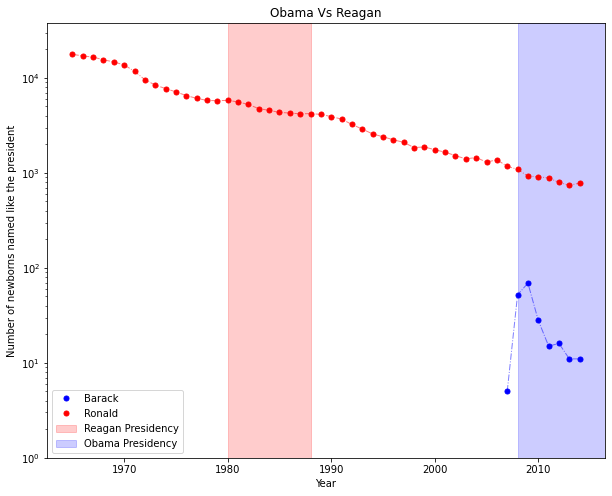

In [29]:
# import PatchCollection to draw rectangles
from matplotlib.collections import PatchCollection

# Recalculate the x limits, just to be safe
x_lim = [ronald['Year'].min(), ronald['Year'].max()]
span_x = x_lim[1] - x_lim[0]
x_lim = [x_lim[0] - (0.05*span_x), x_lim[1] + (0.05*span_x)]


# Nothing changes here
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10, label='Barack')
ax.plot(ronald['Year'], ronald['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(ronald['Year'], ronald['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10, label='Ronald')
ax.set_title('Obama Vs Reagan')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
ax.set_ylim(y_lim)
ax.set_yscale('log')

# Plot rectangles
ax.add_patch(rect_reagan)
ax.add_patch(rect_obama)

# Set the x limit to make sure the Obama rect covers all of the right side
ax.set_xlim(x_lim)


# Finally we add the legend, as we did before.
# Question, why is it in the bottom left corner now?
ax.legend()

##### Exercise 5

We want the two `Rectangle`s above to the plot (and legend) below regarding the "Michelle" and "Nancy" data. Complete the code below:

1. Create (identical) `Rectangle`s as the one above
2. Plot them in the `Axes`

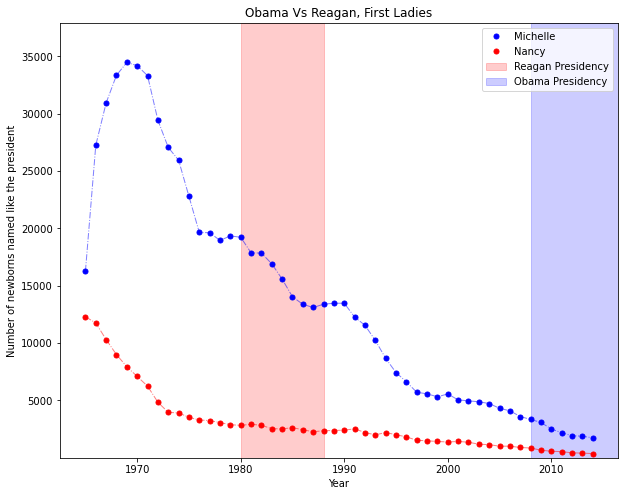

In [30]:
# Calculate x and y limits for the nancy-michelle data
x_lim = [nancy['Year'].min(), nancy['Year'].max()]
span_x = x_lim[1] - x_lim[0]
x_lim = [x_lim[0] - (0.05*span_x), x_lim[1] + (0.05*span_x)]
y_lim = [1, data_max]
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.1*span_y)]

# Remake the plot with the new data
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10, label='Michelle')
ax.plot(nancy['Year'], nancy['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(nancy['Year'], nancy['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10, label='Nancy')
ax.set_title('Obama Vs Reagan, First Ladies')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

# Complete the code:
# Create new (but identical) Obama rectangle for the plot
rect_obama = patches.Rectangle(xy=, width= , height=, color= , 
                               label='Obama Presidency')
# Create new (identical) Reagan rectangle for the plot
rect_reagan = patches.Rectangle()

# Complete the code:
# Add Obama rectangle
ax.add_patch()
# Add Reagan Rectangle
ax


# Now the legend is easy to get
ax.legend()

##### Style

A style is a bundle of settings regarding how `matplotlib` plots elements. If we do not specify otherwise, `matplotlib` uses default values that are set by the style we use. For example, the white background we observed so far is determined by the style we have used. In particular, throughout this workhshop we have used the "default" style, but we can easily swap style if we would like to do so.

If you use `matplotlib` regularly, you may eventually want to create your own style and load it every time you open `matplotlib`. For now, let's use one of the pre-installed styles. First, let's check what is available.

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


You may be wondering, what is the "fivethirtyeight" style? How does it look? Only one way to find out. We will replicate the plot above, but in the new style.

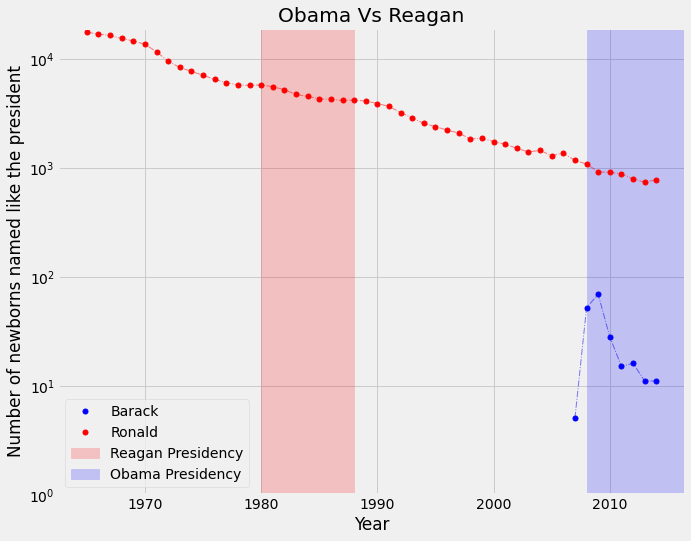

In [33]:
# Changed the y_lim in the previous exercise
y_lim = [1, ronald['Count'].max()]
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.1*span_y)]


# Change style!
plt.style.use('fivethirtyeight')

# Replicate the same plot
# Create new rectangles for the plot. 
rect_reagan = patches.Rectangle(xy=first_reagan_point, width=8, height=y_lim[1], color=(1,0,0,0.2), 
                                label='Reagan Presidency')
rect_obama = patches.Rectangle(first_obama_point, 15, y_lim[1], color=(0,0,1,0.2), label='Obama Presidency')
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(barack['Year'], barack['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10, label='Barack')
ax.plot(ronald['Year'], ronald['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(ronald['Year'], ronald['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10, label='Ronald')
ax.set_title('Obama Vs Reagan')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
ax.set_ylim(y_lim)
ax.set_yscale('log')
ax.add_patch(rect_reagan)
ax.add_patch(rect_obama)
ax.set_xlim(x_lim)
ax.legend()

##### Exercise 6

Replicate the "Michelle", "Nancy" plot with a new style of your choice. You can see the available styles with `print(plt.style.available)`

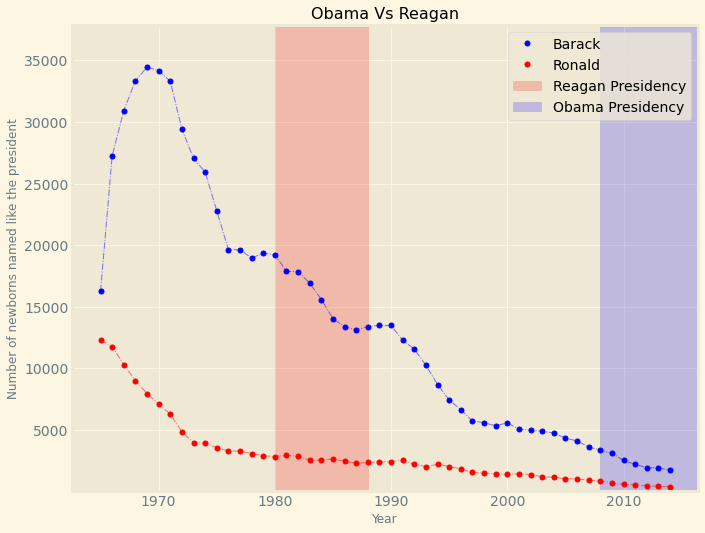

In [34]:
# Calculate x and y limits for the nancy-michelle data
y_lim = [1, data_max]
span_y = y_lim[1]- y_lim[0]
y_lim = [y_lim[0], y_lim[1] + (0.1*span_y)]
x_lim = [nancy['Year'].min(), nancy['Year'].max()]
span_x = x_lim[1] - x_lim[0]
x_lim = [x_lim[0] - (0.05*span_x), x_lim[1] + (0.05*span_x)]

# Change style!
plt.

# Replicate the same plot with same data
fig, ax = plt.subplots(figsize= (10,8))
# Plot data
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(michelle['Year'], michelle['Count'], color=(0, 0, 1), linestyle='None', marker='.', ms=10, label='Barack')
ax.plot(nancy['Year'], nancy['Count'], color=(1, 0, 0, 0.5), linestyle='dashdot', linewidth=1.)
ax.plot(nancy['Year'], nancy['Count'], color=(1,0,0), linestyle='None', marker='.', ms=10, label='Ronald')
# spand and labels
ax.set_title('Obama Vs Reagan')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named like the president')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
# rectangles
rect_reagan = patches.Rectangle(xy=first_reagan_point, width=8, height=y_lim[1], color=(1,0,0,0.2), 
                                label='Reagan Presidency')
rect_obama = patches.Rectangle(first_obama_point, 15, y_lim[1], color=(0,0,1,0.2), label='Obama Presidency')
ax.add_patch(rect_reagan)
ax.add_patch(rect_obama)
# Legend
ax.legend()